In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

In [45]:
df = pd.read_csv("kc_house_data.csv")

In [46]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [47]:
df_1 = df.drop(['id'], axis=1)

In [48]:
df_1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


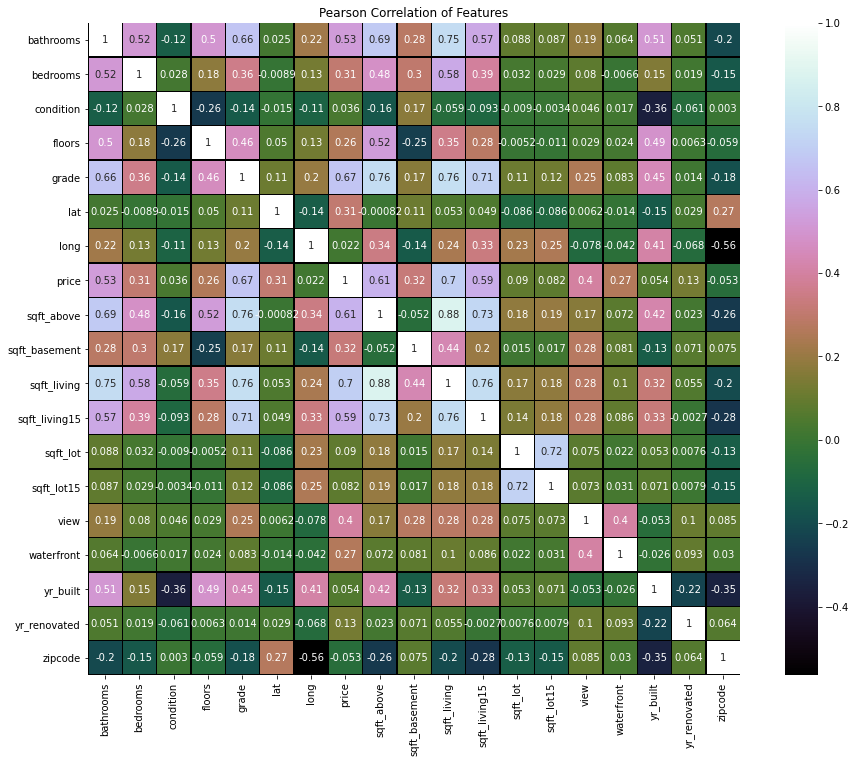

In [49]:
str_list = []
for colname, colvalue in df_1.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
num_list = df_1.columns.difference(str_list)
house_num = df_1[num_list] # 수치형 변수만 뽑아낸 데이터프레임
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of Features') # feature 별로 피어슨 상관관계 살펴보기
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [50]:
df_1['price'] = df_1['price']/10000.0

In [51]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

In [53]:
train_data,test_data = train_test_split(df_1,train_size = 0.8,random_state=3)

lr = linear_model.LinearRegression()
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lr.predict(X_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['sqft_living']],df['price'],cv=5).mean(),'.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,rtesm,cv]
evaluation

Average Price for Test Data: 53.974
Intercept: -4.723581130290029
Coefficient: [0.02822468]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,25.429,0.492,0.496,0.491


In [54]:
lr.predict([[1200]])

array([29.14603669])

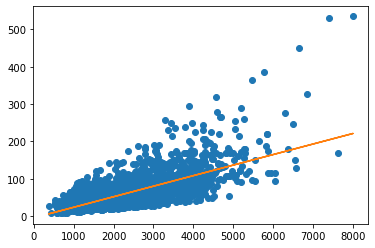

In [55]:
plt.plot(X_test, y_test, 'o')
plt.plot(X_test,lr.predict(X_test))
plt.show()

In [12]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['price'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['price']),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['price']),'.3f'))
cv = float(format(cross_val_score(complex_model_1,df_1[features],df_1['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','selected features',rmsecm,rtrcm,rtecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -5722.12931348587
Coefficients: [-5.68950279e+00  1.13310062e+00  3.18389287e-02 -2.90807628e-05
 -5.79609821e-01  5.84022824e-02]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,selected features,24.851,0.514,0.519,0.512
0,Simple Linear Regression,-,25.429,0.492,0.496,0.491


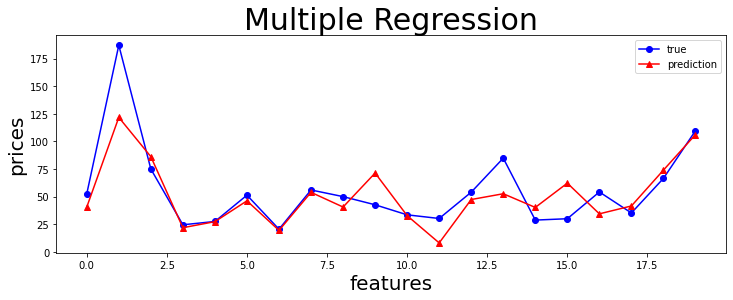

In [13]:
fig = plt.figure(figsize =(12,4))
graph = fig.add_subplot(1,1,1)
graph.plot(test_data['price'][:20].values, marker='o', color='blue', label = 'true')
graph.plot(complex_model_1.predict(test_data[features][:20].values), marker='^',
           color="red", label="prediction")
graph.set_title('Multiple Regression', size=30)
plt.xlabel('features', size=20)
plt.ylabel('prices', size =20)
plt.legend(loc='best')

In [14]:
test_data['price'][:20].values

array([ 52.5  , 187.   ,  75.   ,  24.49 ,  27.5  ,  51.3  ,  20.5  ,
        56.   ,  50.   ,  42.6  ,  33.5  ,  30.2  ,  54.   ,  84.8  ,
        28.745,  29.98 ,  54.2  ,  35.2  ,  66.5  , 109.65 ])

In [15]:
test_data[features][:4]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
4131,3,1.75,1600,9579,1.0,98072
17459,5,4.00,4510,15175,2.0,98040
2192,4,2.75,3190,9023,2.0,98075
12418,1,1.00,620,8261,1.0,98106


In [16]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
complex_model_L = linear_model.Lasso(alpha=0.1)
complex_model_L.fit(train_data[features],train_data['price'])

pred0 = complex_model_L.predict(test_data[features])
rmsecm0 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred0)),'.3f'))
rtrcm0 = float(format(complex_model_L.score(train_data[features],train_data['price']),'.3f'))
rtecm0 = float(format(complex_model_L.score(test_data[features],test_data['price']),'.3f'))
cv0 = float(format(cross_val_score(complex_model_L,test_data[features],test_data['price'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=1)
complex_model_L.fit(train_data[features],train_data['price'])

pred1 = complex_model_L.predict(test_data[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_L.score(train_data[features],train_data['price']),'.3f'))
rtecm1 = float(format(complex_model_L.score(test_data[features],test_data['price']),'.3f'))
cv1 = float(format(cross_val_score(complex_model_L,test_data[features],test_data['price'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=100)
complex_model_L.fit(train_data[features],train_data['price'])

pred2 = complex_model_L.predict(test_data[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_L.score(train_data[features],train_data['price']),'.3f'))
rtecm2 = float(format(complex_model_L.score(test_data[features],test_data['price']),'.3f'))
cv2 = float(format(cross_val_score(complex_model_L,test_data[features],test_data['price'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=1000)
complex_model_L.fit(train_data[features],train_data['price'])

pred3 = complex_model_L.predict(test_data[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_L.score(train_data[features],train_data['price']),'.3f'))
rtecm3 = float(format(complex_model_L.score(test_data[features],test_data['price']),'.3f'))
cv3 = float(format(cross_val_score(complex_model_L,test_data[features],test_data['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=1, all features',rmsecm1,rtrcm1,rtecm1,cv1]
evaluation.loc[r+1] = ['Lasso Regression','alpha=100, all features',rmsecm2,rtrcm2,rtecm2,cv2]
evaluation.loc[r+2] = ['Lasso Regression','alpha=1000, all features',rmsecm3,rtrcm3,rtecm3,cv3]
evaluation.loc[r+2] = ['Lasso Regression','alpha=0.1, all features',rmsecm0,rtrcm0,rtecm0,cv0]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
4,Lasso Regression,"alpha=0.1, all features",20.017,0.671,0.688,0.686
2,Lasso Regression,"alpha=1, all features",22.447,0.601,0.607,0.601
1,Multiple Regression-1,selected features,24.851,0.514,0.519,0.512
3,Lasso Regression,"alpha=100, all features",24.954,0.510,0.515,0.508
0,Simple Linear Regression,-,25.429,0.492,0.496,0.491


In [17]:
# evaluation = evaluation.drop(evaluation.index[0])

In [18]:
complex_model_L = linear_model.Lasso(alpha=1000)
complex_model_L.fit(train_data[features],train_data['price'])

pred3 = complex_model_L.predict(test_data[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_L.score(train_data[features],train_data['price']),'.3f'))
rtecm3 = float(format(complex_model_L.score(test_data[features],test_data['price']),'.3f'))
cv3 = float(format(cross_val_score(complex_model_L,test_data[features],test_data['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=1000, all features',rmsecm3,rtrcm3,rtecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
4,Lasso Regression,"alpha=0.1, all features",20.017,0.671,0.688,0.686
2,Lasso Regression,"alpha=1, all features",22.447,0.601,0.607,0.601
1,Multiple Regression-1,selected features,24.851,0.514,0.519,0.512
3,Lasso Regression,"alpha=100, all features",24.954,0.510,0.515,0.508
5,Lasso Regression,"alpha=1000, all features",25.165,0.500,0.507,0.501
0,Simple Linear Regression,-,25.429,0.492,0.496,0.491


In [19]:
complex_model_L_best = linear_model.Lasso(alpha=1)
complex_model_L_best.fit(train_data[features],train_data['price'])

Lasso(alpha=1)

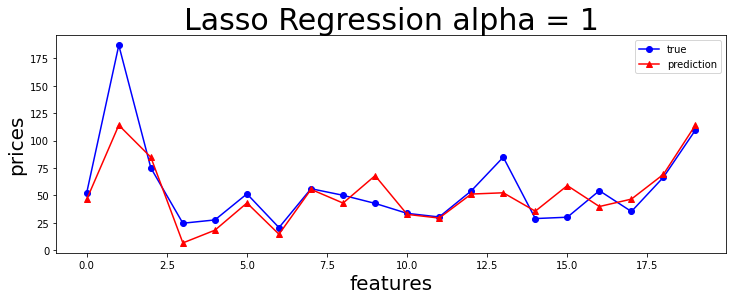

In [20]:
fig = plt.figure(figsize =(12,4))
graph = fig.add_subplot(1,1,1)
graph.plot(test_data['price'][:20].values, marker='o', color='blue', label = 'true')
graph.plot(complex_model_L_best.predict(test_data[features][:20].values), marker='^',
           color="red", label="prediction")
graph.set_title('Lasso Regression alpha = 1', size=30)
plt.xlabel('features', size=20)
plt.ylabel('prices', size =20)
plt.legend(loc='best')

In [21]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
knnreg = KNeighborsRegressor(n_neighbors=5)
knnreg.fit(train_data[features],train_data['price'])
pred = knnreg.predict(test_data[features])

rmseknn1 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn1 = float(format(knnreg.score(train_data[features],train_data['price']),'.3f'))
rteknn1 = float(format(knnreg.score(test_data[features],test_data['price']),'.3f'))
cv1 = float(format(cross_val_score(knnreg,test_data[features],test_data['price'],cv=5).mean(),'.3f'))

knnreg = KNeighborsRegressor(n_neighbors=15)
knnreg.fit(train_data[features],train_data['price'])
pred = knnreg.predict(test_data[features])

rmseknn2 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn2 = float(format(knnreg.score(train_data[features],train_data['price']),'.3f'))
rteknn2 = float(format(knnreg.score(test_data[features],test_data['price']),'.3f'))
cv2 = float(format(cross_val_score(knnreg,test_data[features],test_data['price'],cv=5).mean(),'.3f'))

knnreg = KNeighborsRegressor(n_neighbors=25)
knnreg.fit(train_data[features],train_data['price'])
pred = knnreg.predict(test_data[features])

rmseknn3 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn3 = float(format(knnreg.score(train_data[features],train_data['price']),'.3f'))
rteknn3 = float(format(knnreg.score(test_data[features],test_data['price']),'.3f'))
cv3 = float(format(cross_val_score(knnreg,test_data[features],test_data['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['KNN Regression','k=5, all features',rmseknn1,rtrknn1,rteknn1,cv1]
evaluation.loc[r+1] = ['KNN Regression','k=15, all features',rmseknn2,rtrknn2,rteknn2,cv2]
evaluation.loc[r+2] = ['KNN Regression','k=25, all features',rmseknn3,rtrknn3,rteknn3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
4,Lasso Regression,"alpha=0.1, all features",20.017,0.671,0.688,0.686
2,Lasso Regression,"alpha=1, all features",22.447,0.601,0.607,0.601
1,Multiple Regression-1,selected features,24.851,0.514,0.519,0.512
3,Lasso Regression,"alpha=100, all features",24.954,0.510,0.515,0.508
5,Lasso Regression,"alpha=1000, all features",25.165,0.500,0.507,0.501
0,Simple Linear Regression,-,25.429,0.492,0.496,0.491
7,KNN Regression,"k=15, all features",24.283,0.562,0.541,0.434
8,KNN Regression,"k=25, all features",24.703,0.529,0.525,0.423
6,KNN Regression,"k=5, all features",24.938,0.671,0.516,0.421


In [22]:
knnreg_best = KNeighborsRegressor(n_neighbors=15)
knnreg_best.fit(train_data[features],train_data['price'])

KNeighborsRegressor(n_neighbors=15)

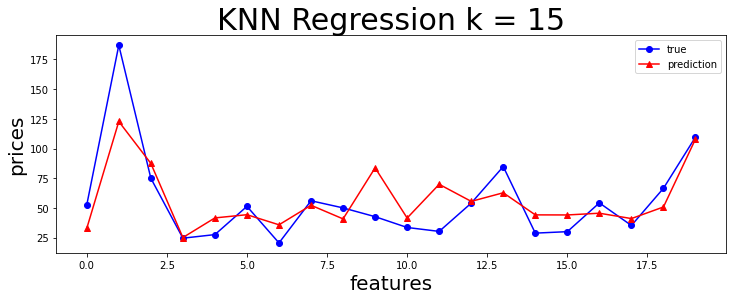

In [23]:
fig = plt.figure(figsize =(12,4))
graph = fig.add_subplot(1,1,1)
graph.plot(test_data['price'][:20].values, marker='o', color='blue', label = 'true')
graph.plot(knnreg_best.predict(test_data[features][:20].values), marker='^',
           color="red", label="prediction")
graph.set_title('KNN Regression k = 15', size=30)
plt.xlabel('features', size=20)
plt.ylabel('prices', size =20)
plt.legend(loc='best')

In [24]:
predicted = complex_model_L_best.predict(test_data[features])
actual = test_data['price']
lasso_act_pred_df = pd.DataFrame({'actual': actual

                            , 'predicted': predicted

                            , 'error': actual - predicted
                            , 'error/actual': (actual - predicted)/actual})

In [25]:
lasso_act_pred_df

,actual,predicted,error,error/actual
4131,52.50,46.358820,6.141180,0.116975
17459,187.00,114.014242,72.985758,0.390298
2192,75.00,84.765863,-9.765863,-0.130212
12418,24.49,6.510711,17.979289,0.734148
15773,27.50,18.128653,9.371347,0.340776
...,...,...,...,...
13300,32.80,33.274696,-0.474696,-0.014472
20400,30.65,24.785990,5.864010,0.191322
10378,97.97,97.953161,0.016839,0.000172
9914,131.50,120.972512,10.527488,0.080057


In [26]:
lasso_act_pred_df['abs_error/actual'] = np.abs(lasso_act_pred_df['error/actual'])
lasso_act_pred_df['abs_error/actual'].max()

3.023806597820779

In [27]:
error_actual_Index = lasso_act_pred_df[lasso_act_pred_df['abs_error/actual']>=0.6].index.tolist()

In [28]:
lasso_act_pred_df[lasso_act_pred_df['abs_error/actual']>=0.6]

,actual,predicted,error,error/actual,abs_error/actual
12418,24.490,6.510711,17.979289,0.734148,0.734148
4703,29.980,58.832952,-28.852952,-0.962407,0.962407
3953,31.700,58.349880,-26.649880,-0.840690,0.840690
4782,26.000,59.408610,-33.408610,-1.284947,1.284947
9574,39.650,65.107702,-25.457702,-0.642061,0.642061
...,...,...,...,...,...
6989,30.310,48.771422,-18.461422,-0.609087,0.609087
16945,48.000,79.560190,-31.560190,-0.657504,0.657504
7120,47.300,116.099964,-68.799964,-1.454545,1.454545
20333,30.978,55.653372,-24.675372,-0.796545,0.796545


In [29]:
test_data_reset = test_data.drop(error_actual_Index)

In [30]:
test_data_reset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4131,20150418T000000,52.50,3,1.75,1600,9579,1.0,0,0,3,8,1180,420,1977,0,98072,47.7662,-122.159,1750,9829
17459,20140506T000000,187.00,5,4.00,4510,15175,2.0,0,0,3,10,4510,0,1969,2002,98040,47.5309,-122.228,3510,13500
2192,20141002T000000,75.00,4,2.75,3190,9023,2.0,0,0,3,9,3190,0,2005,0,98075,47.5898,-121.989,3159,5615
15773,20141002T000000,27.50,4,1.00,1430,27153,1.5,0,0,4,5,1430,0,1934,0,98065,47.5372,-121.744,1880,27153
2945,20150423T000000,51.30,3,1.75,1710,5000,1.0,0,0,4,7,1110,600,1944,0,98107,47.6689,-122.370,920,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13300,20140925T000000,32.80,4,1.00,1360,8136,1.0,0,0,3,7,1360,0,1948,0,98133,47.7366,-122.333,1570,8132
20400,20141030T000000,30.65,2,1.00,840,892,2.0,0,0,3,7,840,0,2006,0,98136,47.5396,-122.387,1030,1007
10378,20141013T000000,97.97,4,2.25,2480,6000,2.0,0,2,3,10,2380,100,1929,0,98199,47.6392,-122.406,3030,5600
9914,20150213T000000,131.50,5,4.00,4420,36342,2.0,0,0,5,10,2740,1680,1982,0,98007,47.6468,-122.151,3720,37034


In [31]:
lr = linear_model.LinearRegression()
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data_reset['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data_reset['price'], dtype=pd.Series)

pred = lr.predict(X_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['sqft_living']],df['price'],cv=5).mean(),'.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression Error Rate Used','-',rmsesm,rtrsm,rtesm,cv]
evaluation
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Average Price for Test Data: 56.310
Intercept: -4.723581130290029
Coefficient: [0.02822468]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
4,Lasso Regression,"alpha=0.1, all features",20.017,0.671,0.688,0.686
2,Lasso Regression,"alpha=1, all features",22.447,0.601,0.607,0.601
1,Multiple Regression-1,selected features,24.851,0.514,0.519,0.512
3,Lasso Regression,"alpha=100, all features",24.954,0.510,0.515,0.508
5,Lasso Regression,"alpha=1000, all features",25.165,0.500,0.507,0.501
0,Simple Linear Regression,-,25.429,0.492,0.496,0.491
9,Simple Linear Regression Error Rate Used,-,24.097,0.492,0.569,0.491
7,KNN Regression,"k=15, all features",24.283,0.562,0.541,0.434
8,KNN Regression,"k=25, all features",24.703,0.529,0.525,0.423
6,KNN Regression,"k=5, all features",24.938,0.671,0.516,0.421


In [32]:
complex_model_L = linear_model.Lasso(alpha=0.1)
complex_model_L.fit(train_data[features],train_data['price'])

pred3 = complex_model_L.predict(test_data_reset[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_reset['price'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_L.score(train_data[features],train_data['price']),'.3f'))
rtecm3 = float(format(complex_model_L.score(test_data_reset[features],test_data_reset['price']),'.3f'))
cv3 = float(format(cross_val_score(complex_model_L,test_data_reset[features],test_data_reset['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression Error Rate Used','alpha=0.1, all features',rmsecm3,rtrcm3,rtecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
10,Lasso Regression Error Rate Used,"alpha=0.1, all features",18.953,0.671,0.733,0.740
4,Lasso Regression,"alpha=0.1, all features",20.017,0.671,0.688,0.686
2,Lasso Regression,"alpha=1, all features",22.447,0.601,0.607,0.601
1,Multiple Regression-1,selected features,24.851,0.514,0.519,0.512
3,Lasso Regression,"alpha=100, all features",24.954,0.510,0.515,0.508
5,Lasso Regression,"alpha=1000, all features",25.165,0.500,0.507,0.501
0,Simple Linear Regression,-,25.429,0.492,0.496,0.491
9,Simple Linear Regression Error Rate Used,-,24.097,0.492,0.569,0.491
7,KNN Regression,"k=15, all features",24.283,0.562,0.541,0.434
8,KNN Regression,"k=25, all features",24.703,0.529,0.525,0.423


In [33]:
knnreg = KNeighborsRegressor(n_neighbors=5)
knnreg.fit(train_data[features],train_data['price'])
pred = knnreg.predict(test_data_reset[features])

rmseknn1 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn1 = float(format(knnreg.score(train_data[features],train_data['price']),'.3f'))
rteknn1 = float(format(knnreg.score(test_data_reset[features],test_data_reset['price']),'.3f'))
cv1 = float(format(cross_val_score(knnreg,test_data_reset[features],test_data_reset['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['KNN Regression Error Rate Used','k=5, all features',rmseknn1,rtrknn1,rteknn1,cv1]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
10,Lasso Regression Error Rate Used,"alpha=0.1, all features",18.953,0.671,0.733,0.740
4,Lasso Regression,"alpha=0.1, all features",20.017,0.671,0.688,0.686
2,Lasso Regression,"alpha=1, all features",22.447,0.601,0.607,0.601
1,Multiple Regression-1,selected features,24.851,0.514,0.519,0.512
3,Lasso Regression,"alpha=100, all features",24.954,0.510,0.515,0.508
5,Lasso Regression,"alpha=1000, all features",25.165,0.500,0.507,0.501
0,Simple Linear Regression,-,25.429,0.492,0.496,0.491
9,Simple Linear Regression Error Rate Used,-,24.097,0.492,0.569,0.491
11,KNN Regression Error Rate Used,"k=5, all features",24.401,0.671,0.558,0.474
7,KNN Regression,"k=15, all features",24.283,0.562,0.541,0.434


In [34]:
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['price'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data_reset[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_reset['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['price']),'.3f'))
rtecm = float(format(complex_model_1.score(test_data_reset[features],test_data_reset['price']),'.3f'))
cv = float(format(cross_val_score(complex_model_1,df_1[features],df_1['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1 Error Rate Used','all features',rmsecm,rtrcm,rtecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -3294.6439244000853
Coefficients: [-3.13218920e+00  4.50699378e-01  1.26776068e-02  1.93885368e-05
 -2.36947733e+00  5.61522802e+01  6.20359414e+00  5.01415529e+00
  7.68894194e+00  7.86608118e-03  4.81152560e-03 -4.19403765e-02
  6.76179403e+01 -3.38368985e+01  2.31319321e-03 -4.01872719e-05]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
10,Lasso Regression Error Rate Used,"alpha=0.1, all features",18.953,0.671,0.733,0.740
4,Lasso Regression,"alpha=0.1, all features",20.017,0.671,0.688,0.686
12,Multiple Regression-1 Error Rate Used,all features,18.858,0.674,0.736,0.674
2,Lasso Regression,"alpha=1, all features",22.447,0.601,0.607,0.601
1,Multiple Regression-1,selected features,24.851,0.514,0.519,0.512
3,Lasso Regression,"alpha=100, all features",24.954,0.510,0.515,0.508
5,Lasso Regression,"alpha=1000, all features",25.165,0.500,0.507,0.501
0,Simple Linear Regression,-,25.429,0.492,0.496,0.491
9,Simple Linear Regression Error Rate Used,-,24.097,0.492,0.569,0.491
11,KNN Regression Error Rate Used,"k=5, all features",24.401,0.671,0.558,0.474


In [35]:
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
10,Lasso Regression Error Rate Used,"alpha=0.1, all features",18.953,0.671,0.733,0.740
4,Lasso Regression,"alpha=0.1, all features",20.017,0.671,0.688,0.686
12,Multiple Regression-1 Error Rate Used,all features,18.858,0.674,0.736,0.674
2,Lasso Regression,"alpha=1, all features",22.447,0.601,0.607,0.601
1,Multiple Regression-1,selected features,24.851,0.514,0.519,0.512
3,Lasso Regression,"alpha=100, all features",24.954,0.510,0.515,0.508
5,Lasso Regression,"alpha=1000, all features",25.165,0.500,0.507,0.501
0,Simple Linear Regression,-,25.429,0.492,0.496,0.491
9,Simple Linear Regression Error Rate Used,-,24.097,0.492,0.569,0.491
11,KNN Regression Error Rate Used,"k=5, all features",24.401,0.671,0.558,0.474


In [36]:
evaluation.sort_values(by = 'Root Mean Squared Error (RMSE)', ascending=True)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
12,Multiple Regression-1 Error Rate Used,all features,18.858,0.674,0.736,0.674
10,Lasso Regression Error Rate Used,"alpha=0.1, all features",18.953,0.671,0.733,0.740
4,Lasso Regression,"alpha=0.1, all features",20.017,0.671,0.688,0.686
2,Lasso Regression,"alpha=1, all features",22.447,0.601,0.607,0.601
9,Simple Linear Regression Error Rate Used,-,24.097,0.492,0.569,0.491
7,KNN Regression,"k=15, all features",24.283,0.562,0.541,0.434
11,KNN Regression Error Rate Used,"k=5, all features",24.401,0.671,0.558,0.474
8,KNN Regression,"k=25, all features",24.703,0.529,0.525,0.423
1,Multiple Regression-1,selected features,24.851,0.514,0.519,0.512
6,KNN Regression,"k=5, all features",24.938,0.671,0.516,0.421


In [37]:
def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [38]:
train_targets = y_train

In [39]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]  
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(  
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

model = build_model()  # 케라스 모델 구성(컴파일 포함)
model.fit(partial_train_data, partial_train_targets,  
          epochs=num_epochs, batch_size=1, verbose=0)
val_mse = model.evaluate(val_data, val_targets, verbose=0)  
all_scores.append(np.sqrt(val_mse))

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
# 텐서플로와 CNN 사용은 보류.

In [40]:
evaluation_ = evaluation.set_index('Model')

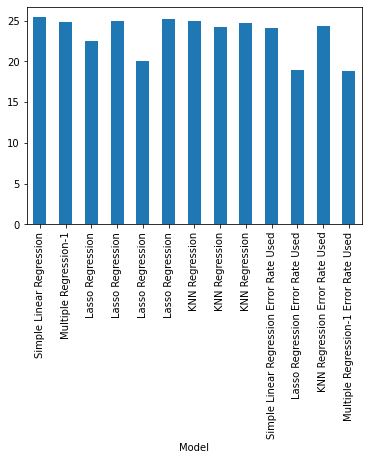

In [41]:
evaluation_['Root Mean Squared Error (RMSE)'].plot(kind='bar')

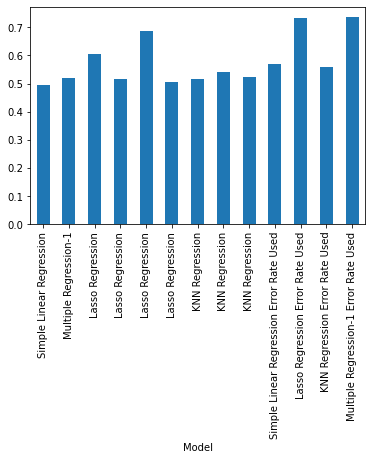

In [42]:
evaluation_['R-squared (test)'].plot(kind='bar')

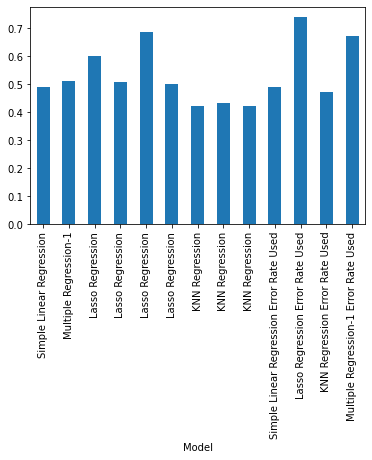

In [43]:
evaluation_['5-Fold Cross Validation'].plot(kind='bar')